Epoch 0: Loss = 4.4219e+03
Epoch 20: Loss = 7.6958e+02
Epoch 40: Loss = 6.7973e+02
Epoch 60: Loss = 6.4729e+02
Epoch 80: Loss = 6.3374e+02
Epoch 100: Loss = 6.2667e+02
Epoch 120: Loss = 6.1221e+02
Epoch 140: Loss = 5.9416e+02
Epoch 160: Loss = 5.7071e+02
Epoch 180: Loss = 5.3836e+02
Epoch 200: Loss = 4.9363e+02
Epoch 220: Loss = 4.3372e+02
Epoch 240: Loss = 3.6805e+02
Epoch 260: Loss = 2.9992e+02
Epoch 280: Loss = 2.3705e+02
Epoch 300: Loss = 1.8479e+02
Epoch 320: Loss = 1.4402e+02
Epoch 340: Loss = 1.1257e+02
Epoch 360: Loss = 8.8444e+01
Epoch 380: Loss = 6.9789e+01
Epoch 400: Loss = 5.3996e+01
Epoch 420: Loss = 4.3061e+01
Epoch 440: Loss = 3.4761e+01
Epoch 460: Loss = 2.8350e+01
Epoch 480: Loss = 2.3390e+01
Epoch 500: Loss = 1.9553e+01
Epoch 520: Loss = 1.6574e+01
Epoch 540: Loss = 1.4239e+01
Epoch 560: Loss = 1.2385e+01
Epoch 580: Loss = 1.0890e+01
Epoch 600: Loss = 9.6674e+00
Epoch 620: Loss = 8.6548e+00
Epoch 640: Loss = 7.8066e+00
Epoch 660: Loss = 7.0894e+00
Epoch 680: Loss = 6.

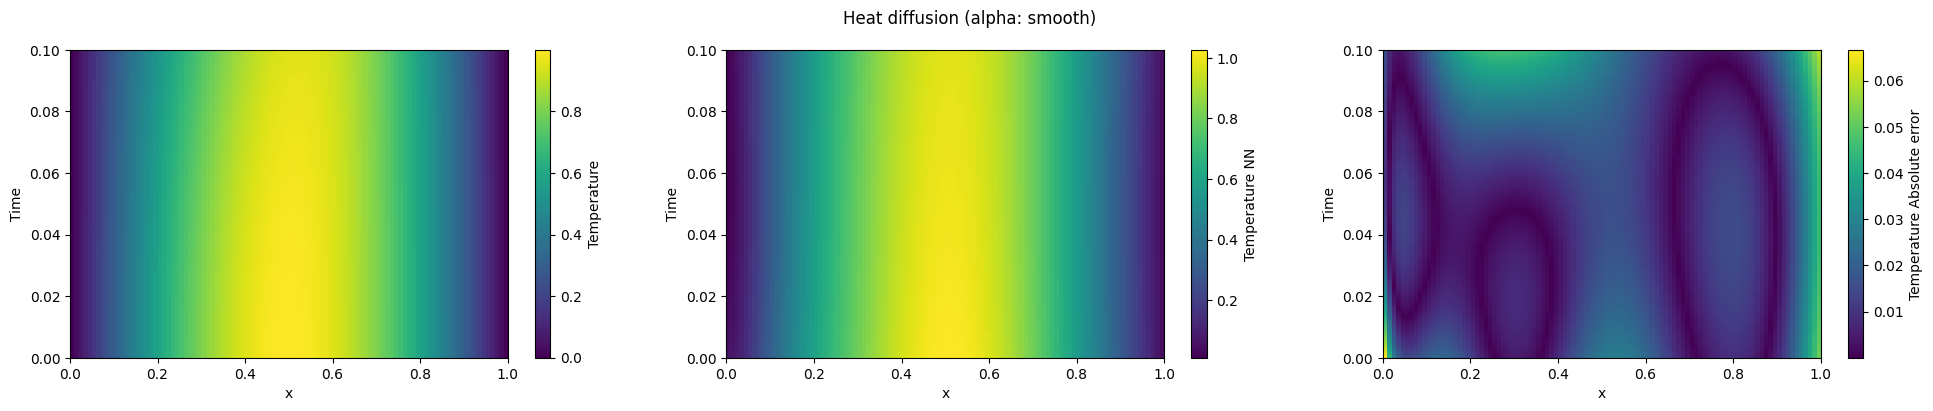

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from torch.utils.data import ConcatDataset

from src.data_generator.heat_equations import HeatEquationDataset
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.data_generator.wave_equations import WaveEquationDataset

from src.train.multi_physics_train import train
from src.figures.figures import plot_sample
from src.models.multi_physics import Encoder, Decoder
from src.loss_function.loss_function import Loss


if __name__ == "__main__":

    # Create Dataset
    wave_dataset = WaveEquationDataset(n_samples=2, nx=100, nt=100)
    diffusion_dataset = DiffusionEquationDataset(n_samples=2, nx=100, nt=100)
    heat_dataset = HeatEquationDataset(n_samples=2, nx=100, nt=100)
    dataset = ConcatDataset([wave_dataset, diffusion_dataset, heat_dataset])

    # Define PINNS
    encoder = Encoder()
    decoder = Decoder()

    # training
    encoder.train()
    decoder.train()

    lr = 1e-3 
    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=lr)
    loss = Loss()
    train(
        loss_function=loss,
        optimizer=optimizer,
        dataset=dataset,
        encoder=encoder,
        decoder=decoder
    )

    # plot
    encoder.eval()
    decoder.eval()

